In [2]:
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()
print(covtype.data.shape)

(581012, 54)


In [4]:
import random
random_numbers = random.sample(range(covtype.data.shape[0]), 10000)
sample = covtype.data[random_numbers, :]

## PCA reteniendo 90% de la varianza

In [18]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(sample)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=54)
pca.fit(X)

PCA(n_components=54)

In [20]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i


## Calculamos las compoentes para retener el 90% de la varianza del dataset original
min_var(0.9,pca.explained_variance_ratio_)

20

In [21]:
pca = PCA(n_components=20)
X_= pca.fit_transform(X)

## Kmeans con random para k $\in$ [5,6,7,8,9,10]

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=20, n_init=4)

In [25]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

estimator = make_pipeline(MinMaxScaler(), kmeans).fit(X_)

In [26]:
print(silhouette_score(X_, estimator[-1].labels_, metric="euclidean",))

0.38940174690069196


## Determinar el mejor valor de k segun el silhouette score promedio

In [30]:
import numpy as np

In [27]:
X = X_

Para k=  5 Silhouette score promedio:  0.3681804521515146
Para k=  6 Silhouette score promedio:  0.3433485937432229
Para k=  7 Silhouette score promedio:  0.40178358427531696
Para k=  8 Silhouette score promedio:  0.41422741067826757
Para k=  9 Silhouette score promedio:  0.39807682218859397
Para k=  10 Silhouette score promedio:  0.3609962681738006


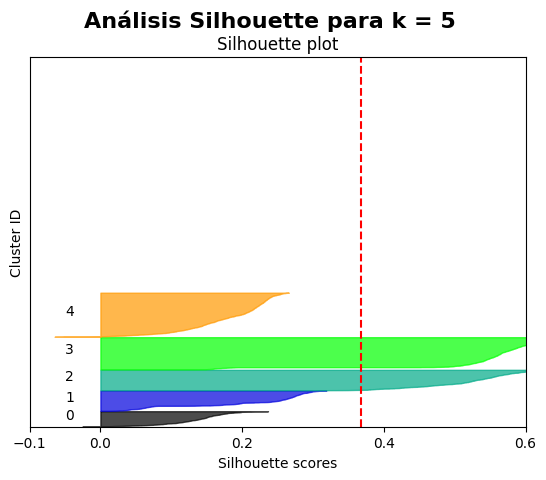

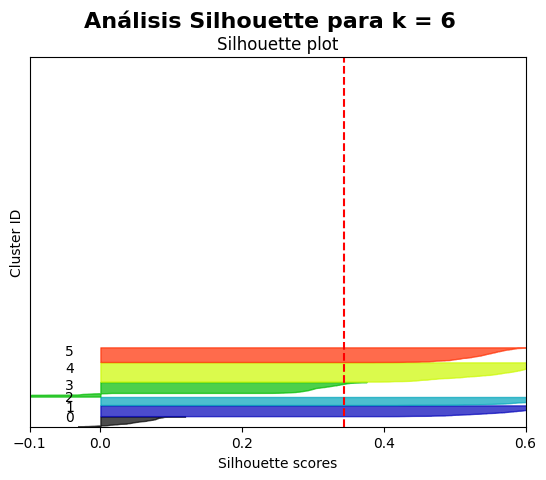

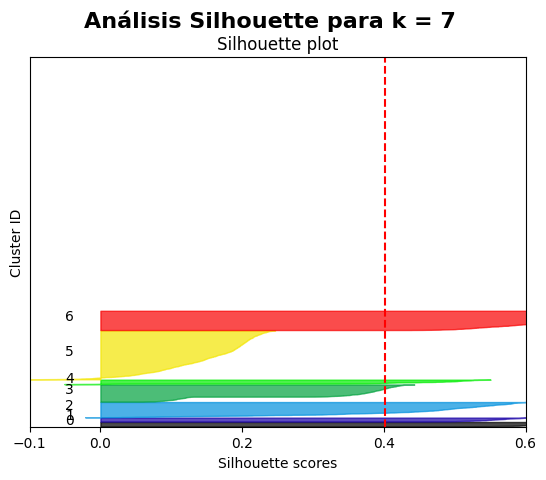

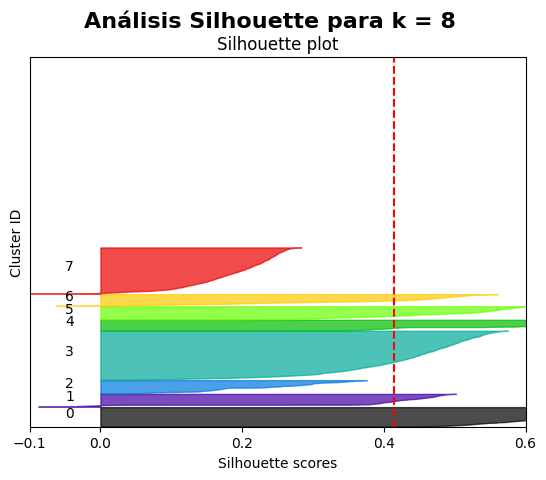

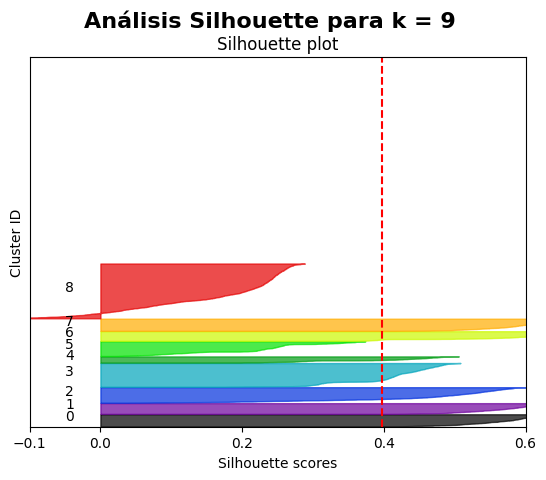

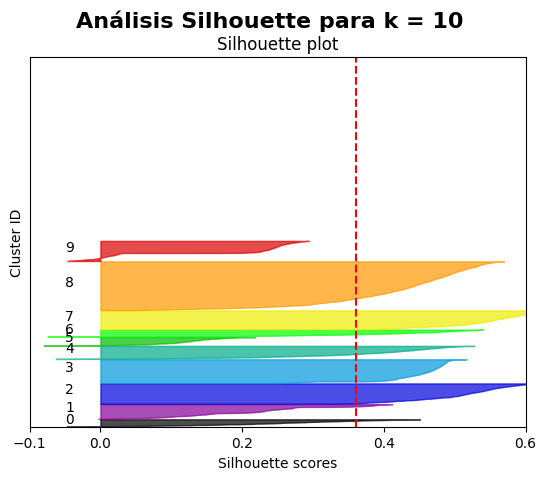

In [33]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

range_n_clusters = [5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    
    fig, ax = plt.subplots(figsize=(6, 12))
    

    ax.set_xlim([-0.1, 0.6])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    cluster_labels = estimator.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para k= ",
        n_clusters,
        "Silhouette score promedio: ",
        silhouette_avg,
    )

    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax.set_title("Silhouette plot")
    ax.set_xlabel("Silhouette scores")
    ax.set_ylabel("Cluster ID")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6])


    plt.suptitle(
        "Análisis Silhouette para k = %d"
        % n_clusters,
        fontsize=16,
        fontweight="bold",
    )

plt.show()

## Un cluster malformado para k = 7

Cluster n5 no tiene ningun dato por sobre el promedio

## Un cluster malformado para k = 10

Cluster n9

### Que valor de k utilizaría

k=10 ya que tiene un valor promedio relativamente alto y la mayoría de los clusters lo superan

### Correr el mismo analisis

Para k=  5 Silhouette score promedio:  0.41163834791503223
Para k=  6 Silhouette score promedio:  0.39519530754236193
Para k=  7 Silhouette score promedio:  0.4285818801006587
Para k=  8 Silhouette score promedio:  0.4082492688885535
Para k=  9 Silhouette score promedio:  0.3862275749732458
Para k=  10 Silhouette score promedio:  0.39448185254353557


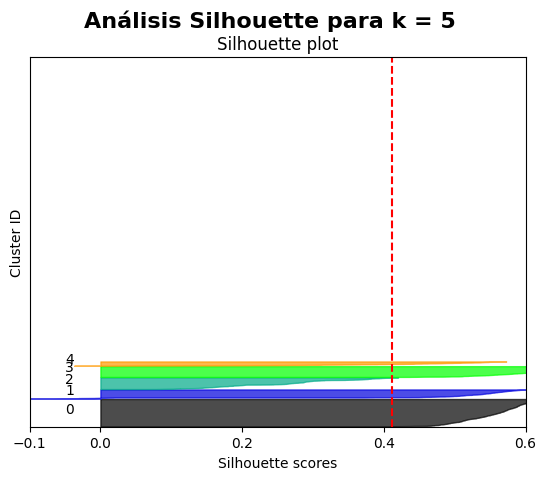

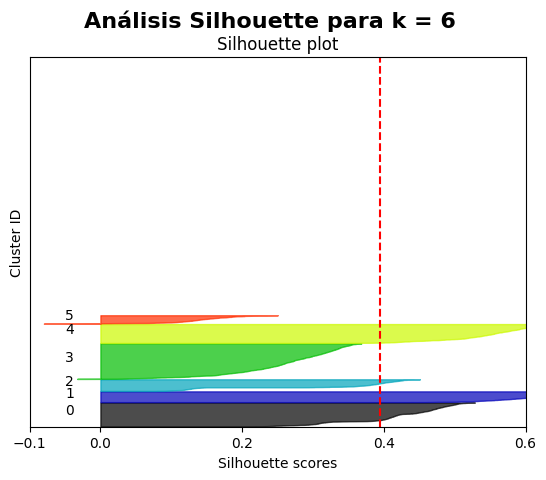

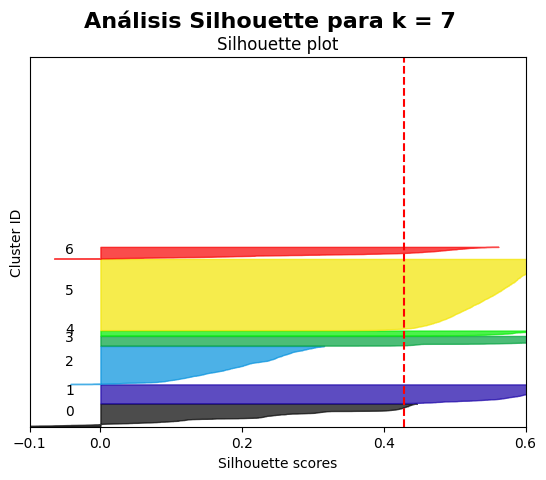

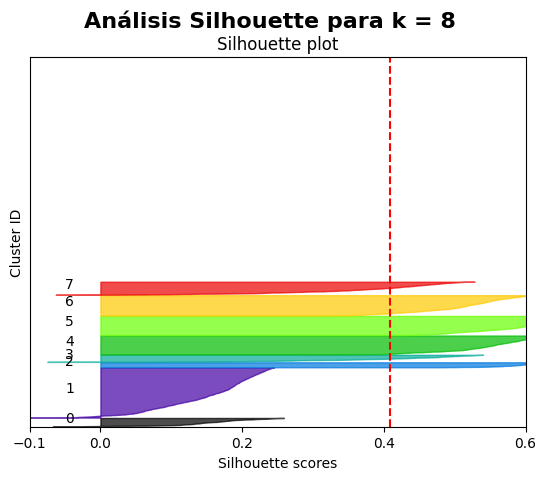

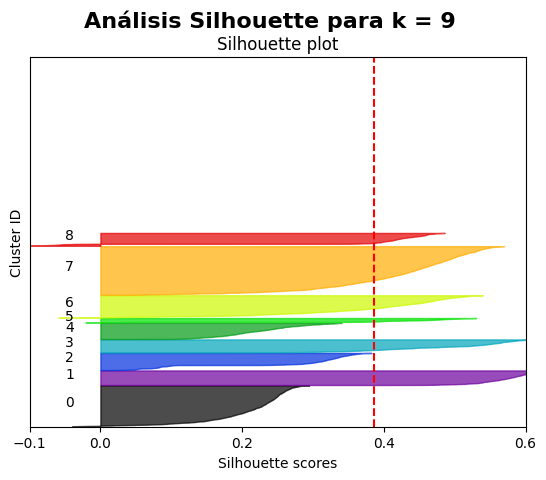

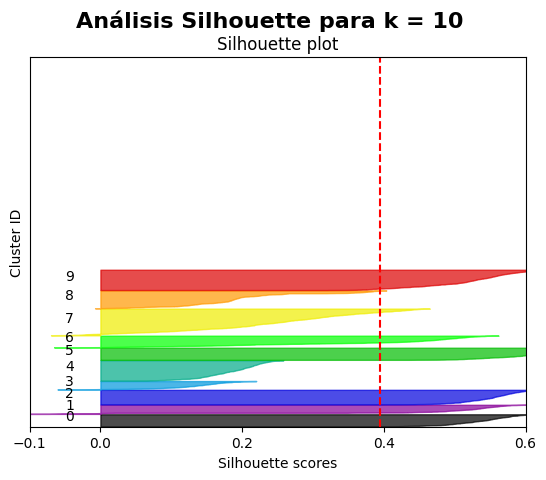

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

range_n_clusters = [5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    
    fig, ax = plt.subplots(figsize=(6, 12))
    

    ax.set_xlim([-0.1, 0.6])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    cluster_labels = estimator.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para k= ",
        n_clusters,
        "Silhouette score promedio: ",
        silhouette_avg,
    )

    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax.set_title("Silhouette plot")
    ax.set_xlabel("Silhouette scores")
    ax.set_ylabel("Cluster ID")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6])


    plt.suptitle(
        "Análisis Silhouette para k = %d"
        % n_clusters,
        fontsize=16,
        fontweight="bold",
    )

plt.show()

Primr run:
Para k=  5 Silhouette score promedio:  0.3681804521515146
Para k=  6 Silhouette score promedio:  0.3433485937432229
Para k=  7 Silhouette score promedio:  0.40178358427531696
Para k=  8 Silhouette score promedio:  0.41422741067826757
Para k=  9 Silhouette score promedio:  0.39807682218859397
Para k=  10 Silhouette score promedio:  0.3609962681738006

Segundo run:
Para k=  5 Silhouette score promedio:  0.41163834791503223
Para k=  6 Silhouette score promedio:  0.39519530754236193
Para k=  7 Silhouette score promedio:  0.4285818801006587
Para k=  8 Silhouette score promedio:  0.4082492688885535
Para k=  9 Silhouette score promedio:  0.3862275749732458
Para k=  10 Silhouette score promedio:  0.39448185254353557

No se obtienen los mismos resultados, esto se debe a la inicializacion random de kmeans.